# Project 4 - Predicting Terrorism

In [1]:
import pandas as pd
import glob
import pandas as pd
import numpy as np

db = '/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv'
df = pd.read_csv(db, header=0,low_memory=False)
print 'Size = ',len(df)

Size =  156772


# I. EDA

In [2]:
def eda(dataframe):
    from IPython.core import display as ICD
    print "dataframe shape: ",dataframe.shape      ## rows by columns
    print ''
    print 'num duplicates:', dataframe.duplicated().sum() ## df.drop_duplicates() to remove dupes
    print ''
    print "pct missing values \n"
    ICD.display(pd.DataFrame(dataframe.isnull().sum()/len(df)*100),columns=['Columns','Pct Missing']), ## count number of null values per column
    print ''
    print "dataframe types \n"
    ICD.display(pd.DataFrame(dataframe.dtypes),columns=['Columns','Dtype'])       ## list data type of each column
    print ''
    print "dataframe describe \n"
    ICD.display(pd.DataFrame(dataframe.describe()))## stats -- mean, min, max, etc.. 
    print ''
    print '# unique values in series:\n'
    u_list = []
    for item in dataframe:                             ## count number of unique values per column
        u_list.append([item, dataframe[item].nunique()])
    unique_vals = pd.DataFrame(u_list,columns=['Column','Num_unique'])
    ICD.display(unique_vals)

eda(df)

dataframe shape:  (156772, 137)

num duplicates: 0

pct missing values 



,0
eventid,0.000000
iyear,0.000000
imonth,0.000000
iday,0.000000
approxdate,96.966295
extended,0.000000
resolution,97.766183
country,0.000000
country_txt,0.000000
region,0.000000



dataframe types 



,0
eventid,int64
iyear,int64
imonth,int64
iday,int64
approxdate,object
extended,int64
resolution,object
country,int64
country_txt,object
region,int64



dataframe describe 



,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.567720e+05,156772.000000,156772.000000,156772.000000,156772.000000,156772.000000,156772.000000,152253.000000,152253.000000,156772.000000,...,1.195000e+03,4.110000e+02,6.230000e+02,402.000000,8685.000000,8095.000000,156772.000000,156772.000000,156772.000000,156772.000000
mean,2.000541e+11,2000.474083,6.484666,15.455215,0.041347,133.087401,6.970097,23.190988,24.210467,1.452632,...,3.320127e+06,5.454451e+05,4.319721e+05,305.196517,4.592170,-27.788635,-4.834645,-4.789114,0.093894,-4.221124
std,1.298283e+09,12.982397,3.392225,8.815533,0.199091,113.946290,2.967803,19.220723,59.900831,1.016971,...,3.187694e+07,6.665967e+06,2.589893e+06,3409.027685,2.049184,58.524976,4.528862,4.589779,0.602442,4.686143
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-176.176447,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.989082e+11,1989.000000,4.000000,8.000000,0.000000,69.000000,5.000000,10.756961,-1.929857,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.005071e+11,2005.000000,6.000000,15.000000,0.000000,101.000000,6.000000,31.285506,41.919647,1.000000,...,1.250000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.013060e+11,2013.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.842222,68.416974,1.000000,...,4.115000e+05,0.000000e+00,4.276840e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.015123e+11,2015.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,179.366667,5.000000,...,1.000000e+09,1.320000e+08,4.100000e+07,48000.000000,7.000000,1201.000000,1.000000,1.000000,1.000000,1.000000



# unique values in series:



,Column,Num_unique
0,eventid,156772
1,iyear,45
2,imonth,13
3,iday,32
4,approxdate,1426
5,extended,2
6,resolution,2657
7,country,206
8,country_txt,206
9,region,12


#### Standardize Country Names to join Dataframes

In [3]:
import geopandas as gpd
from shapely.geometry import Point
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

df.country_txt.replace(fix_countries, inplace=True)

### Types of Attacks

In [4]:
df.attacktype1_txt.value_counts()

Bombing/Explosion                      75963
Armed Assault                          37554
Assassination                          17582
Hostage Taking (Kidnapping)             9115
Facility/Infrastructure Attack          8849
Unknown                                 5490
Hostage Taking (Barricade Incident)      835
Unarmed Assault                          828
Hijacking                                556
Name: attacktype1_txt, dtype: int64

In [60]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'

plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 

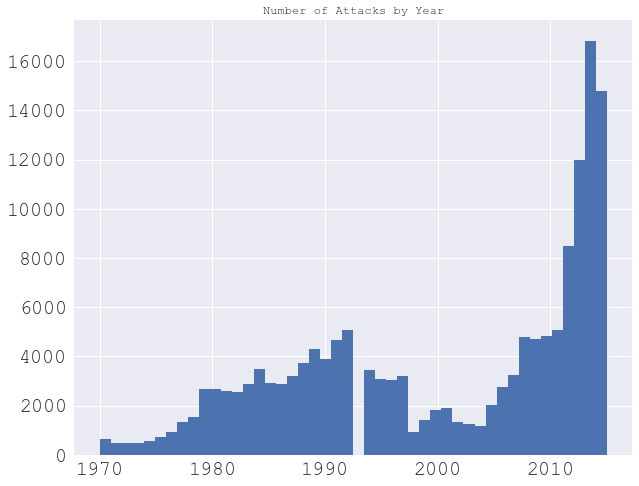

In [61]:
plt.hist(df.iyear,bins=46)
plt.title('Number of Attacks by Year')
plt.show()

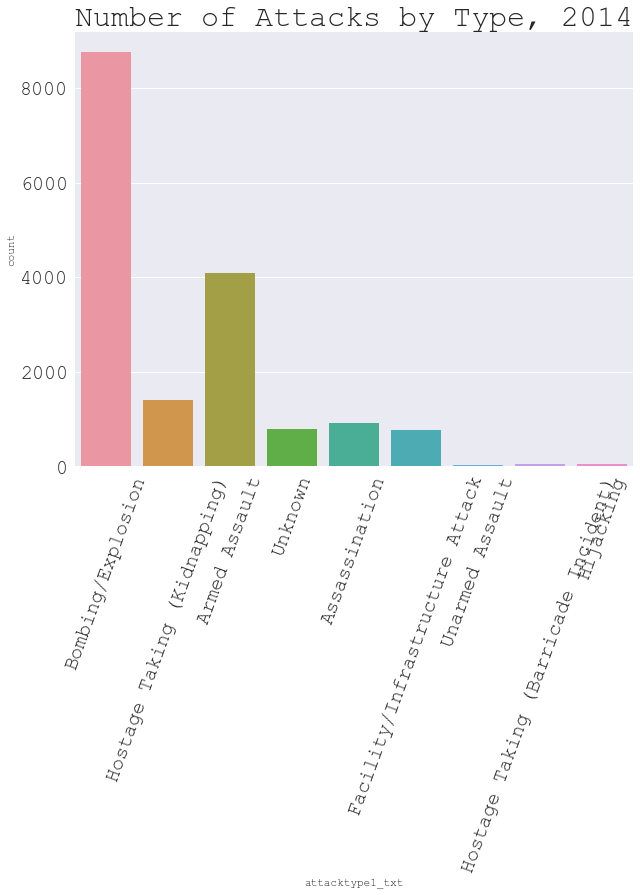

In [62]:
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
sns.countplot(x="attacktype1_txt", data=df[df.iyear==2014])
plt.title('Number of Attacks by Type, 2014',size=30)
plt.xticks(rotation=70)
plt.show()

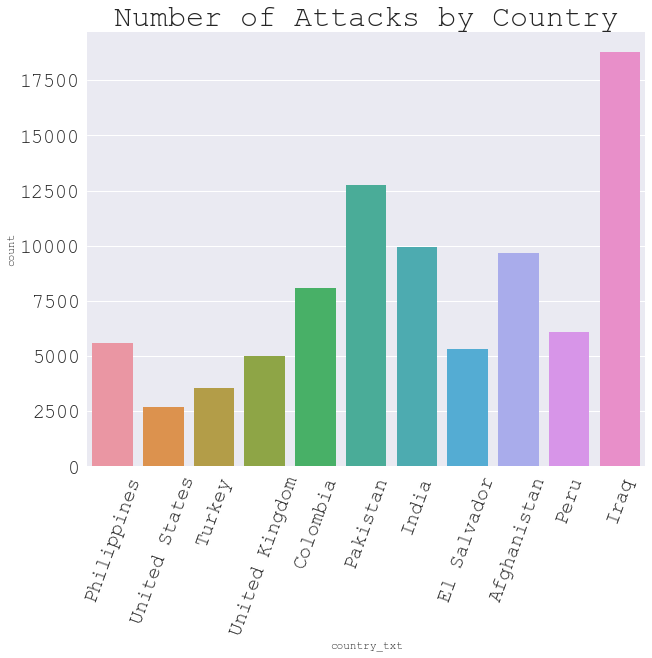

In [63]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df.groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[df.country_txt.isin(countries)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country',size=30)
plt.xticks(rotation=70)
plt.show()

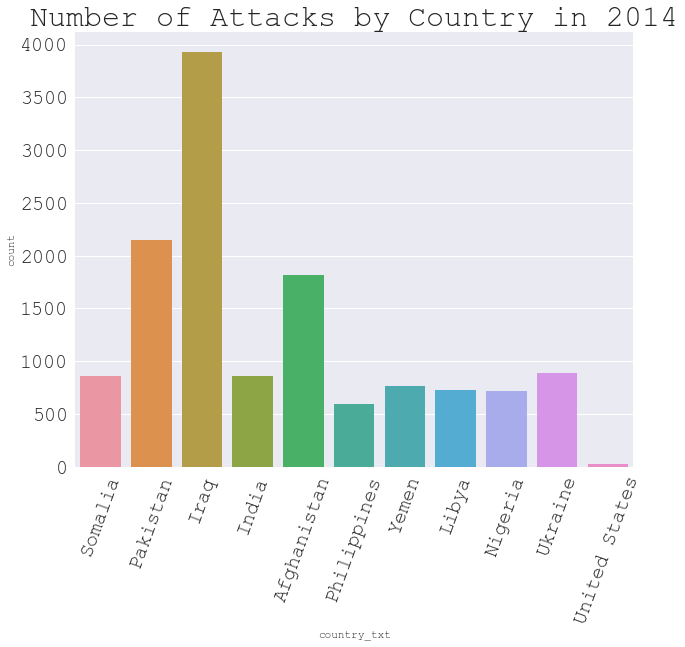

In [64]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
countries = df[df.iyear==2014].groupby(['country_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
countries = list(countries.country_txt)
countries.append('United States')
mask = df[(df.country_txt.isin(countries))&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

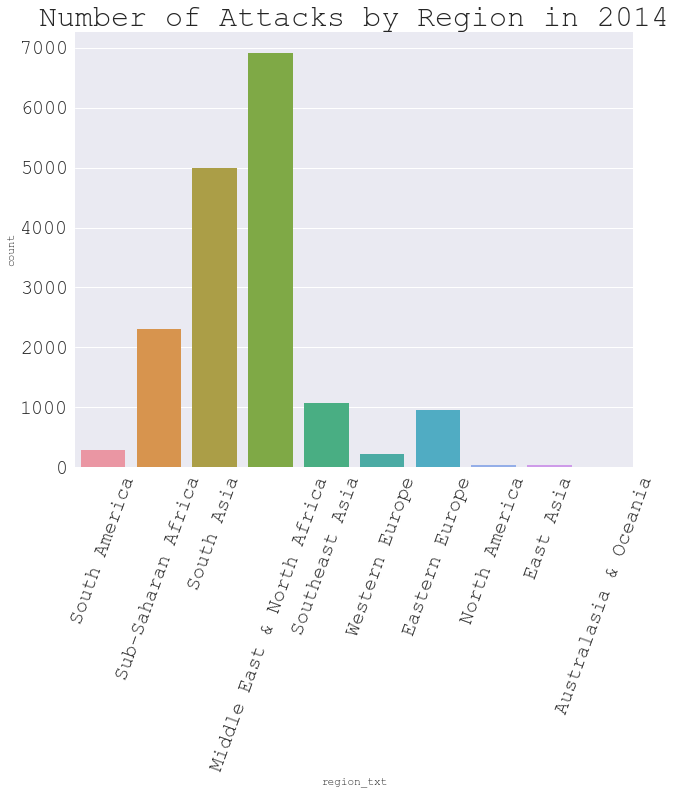

In [65]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
regions = df[df.iyear==2014].groupby(['region_txt']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:10]
regions = list(regions.region_txt)
mask = df[(df.region_txt.isin(regions))&(df.iyear==2014)]
sns.countplot(x="region_txt", data=mask)
plt.title('Number of Attacks by Region in 2014',size=30)
plt.xticks(rotation=70)
plt.show()

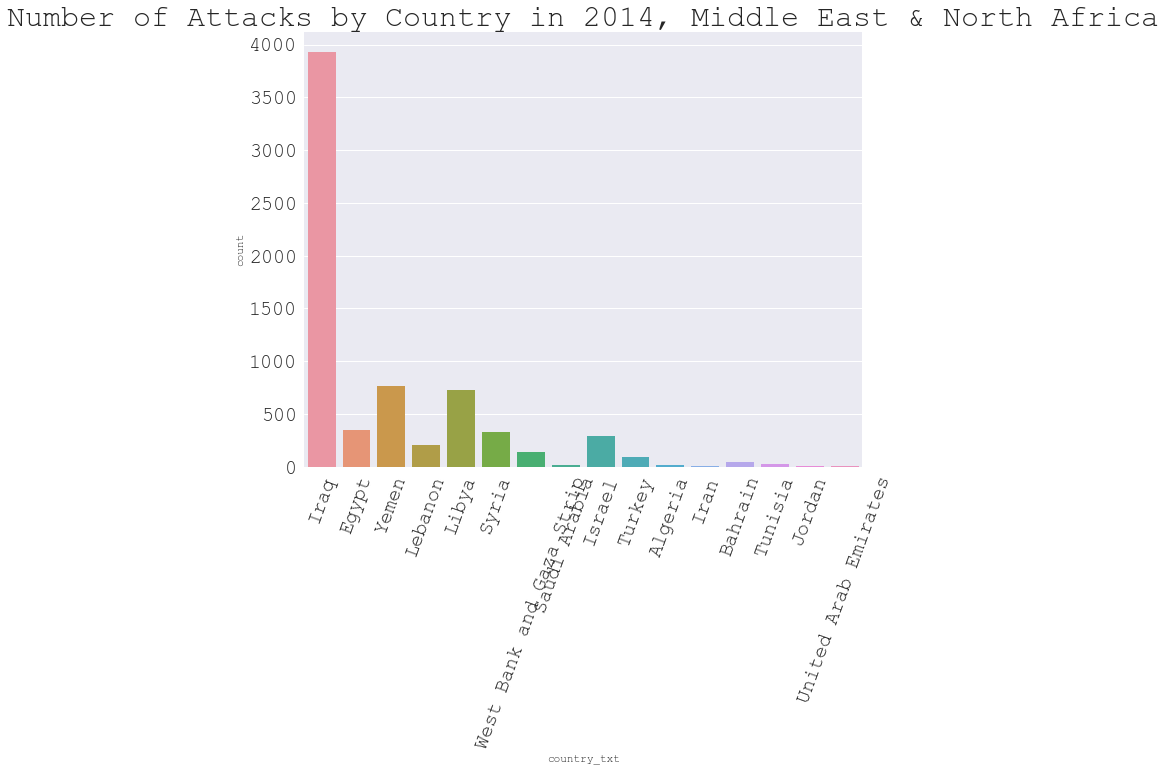

In [66]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 20 
plt.rcParams['ytick.labelsize'] = 20 
mask = df[(df.region_txt=='Middle East & North Africa')&(df.iyear==2014)]
sns.countplot(x="country_txt", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

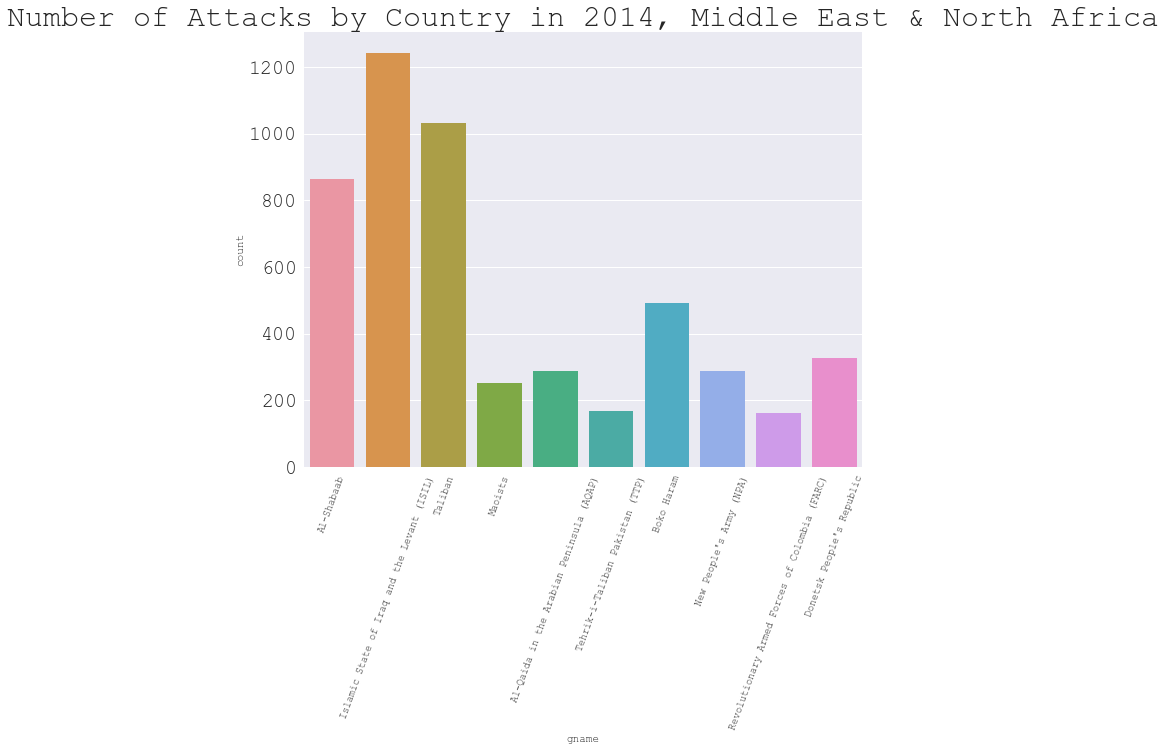

In [124]:
import seaborn as sns
# plt.rcParams['figure.figsize'] = (16, 14)
plt.rcParams['font.size'] = 30
plt.rcParams['font.family'] = 'Courier New, monospace'
plt.rcParams['xtick.labelsize'] = 10 
plt.rcParams['ytick.labelsize'] = 20 
gnames = df[df.iyear==2014].groupby(['gname']).attacktype1.count().reset_index().sort_values('attacktype1',ascending=False)[0:11]
gnames = list(gnames.gname)[1:]
mask = df[(df.gname.isin(gnames))&(df.iyear==2014)]
sns.countplot(x="gname", data=mask)
plt.title('Number of Attacks by Country in 2014, Middle East & North Africa',size=30)
plt.xticks(rotation=70)
plt.show()

In [12]:
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [102]:
df_before = df[(df.iyear<2001)&(df.iyear>=1987)]
df_after = df[(df.iyear>2001)&(df.iyear<=2015)]

In [7]:
types = pd.DataFrame(df_before[['attacktype1_txt','attacktype1','attacktype2','attacktype3']].groupby('attacktype1_txt').count()).reset_index()
types['num_before'] = types.attacktype1+types.attacktype2+types.attacktype3
types = types[['attacktype1_txt','num_before']]
types['pct_before'] = types.num_before / len(df_before)


types_temp = pd.DataFrame(df_after[['attacktype1_txt','attacktype1','attacktype2','attacktype3']].groupby('attacktype1_txt').count()).reset_index()
types['num_after'] =  types_temp.attacktype1+types_temp.attacktype2+types_temp.attacktype3
types['pct_after'] = types.num_after / len(df_after)

types['delta'] = types.pct_after - types.pct_before


total_suicide_before = df_before.suicide[df_before.suicide==1].sum()
total_suicide_after = df_after.suicide[df_after.suicide==1].sum()

types['suicide_before'] = pd.DataFrame(df_before[['attacktype1_txt','suicide']].groupby('attacktype1_txt').suicide.sum()).reset_index()['suicide']
types['pct_suicide_before'] = types['suicide_before'] / total_suicide_before
types['suicide_after'] = pd.DataFrame(df_after[['attacktype1_txt','suicide']].groupby('attacktype1_txt').suicide.sum()).reset_index()['suicide']
types['pct_suicide_after'] = types['suicide_after'] / total_suicide_after

types

,attacktype1_txt,num_before,pct_before,num_after,pct_after,delta,suicide_before,pct_suicide_before,suicide_after,pct_suicide_after
0,Armed Assault,1979,0.299395,5758,0.189371,-0.110024,0,0.000000,4,0.001599
1,Assassination,1509,0.228290,1869,0.061468,-0.166822,2,0.032787,68,0.027189
2,Bombing/Explosion,2275,0.344175,20232,0.665395,0.321219,57,0.934426,2403,0.960816
3,Facility/Infrastructure Attack,346,0.052345,511,0.016806,-0.035539,0,0.000000,0,0.000000
4,Hijacking,28,0.004236,54,0.001776,-0.002460,0,0.000000,1,0.000400
5,Hostage Taking (Barricade Incident),13,0.001967,77,0.002532,0.000566,0,0.000000,13,0.005198
6,Hostage Taking (Kidnapping),236,0.035703,1958,0.064395,0.028692,0,0.000000,12,0.004798
7,Unarmed Assault,72,0.010893,70,0.002302,-0.008590,0,0.000000,0,0.000000
8,Unknown,234,0.035401,830,0.027297,-0.008104,2,0.032787,0,0.000000


In [254]:
suicides_by_year = pd.DataFrame(df[['iyear','suicide']][df.attacktype1_txt=='Bombing/Explosion'].groupby('iyear').suicide.sum()).reset_index('suicide')
suicides_by_year_middle_east = pd.DataFrame(df[['iyear','suicide']][(df.attacktype1_txt=='Bombing/Explosion')&(df.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.sum()).reset_index('suicide')
attacks_by_year = pd.DataFrame(df[['iyear','suicide']].groupby('iyear').suicide.count()).reset_index('suicide')
attacks_by_year_middle_east = pd.DataFrame(df[['iyear','suicide']][(df.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')

suicides_by_year_middle_east.set_index('iyear',inplace=True)
suicides_by_year.set_index('iyear',inplace=True)
attacks_by_year_middle_east.set_index('iyear',inplace=True)
attacks_by_year.set_index('iyear',inplace=True)

df_before = df[(df.iyear<2001)&(df.iyear>=1987)]
df_after = df[(df.iyear>2001)&(df.iyear<=2015)]

before_middle_east = pd.DataFrame(df_before[['iyear','suicide']][(df_before.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')
after_middle_east = pd.DataFrame(df_after[['iyear','suicide']][(df_after.region_txt=='Middle East & North Africa')].groupby('iyear').suicide.count()).reset_index('suicide')
before_middle_east.set_index('iyear',inplace=True)
after_middle_east.set_index('iyear',inplace=True)

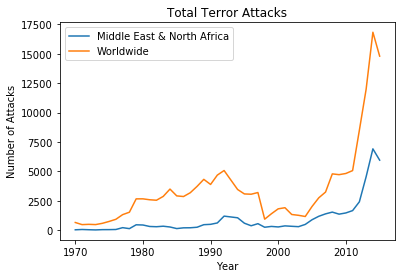

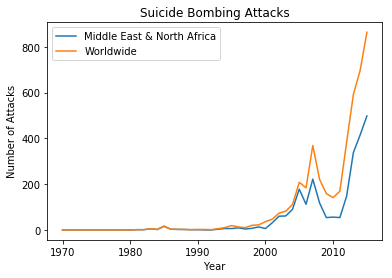

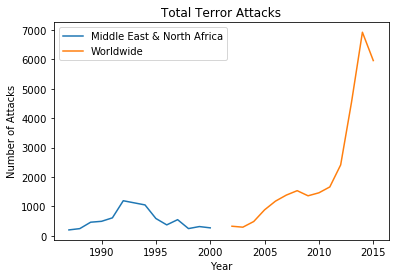

In [255]:
from matplotlib import pyplot as plt


plt.plot(attacks_by_year_middle_east, label="Middle East & North Africa")
plt.plot(attacks_by_year, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Total Terror Attacks')
plt.legend()
plt.show()

plt.plot(suicides_by_year_middle_east, label="Middle East & North Africa")
plt.plot(suicides_by_year, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Suicide Bombing Attacks')
plt.legend()
plt.show()

plt.plot(before_middle_east, label="Middle East & North Africa")
plt.plot(after_middle_east, label="Worldwide")
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Total Terror Attacks')
plt.legend()
plt.show()

# II. Bayesian Inference

I'm going to compare the number of suicide bombings/explosions before and after 9/11. Although 9/11 is classified as 'Hijaking,' it involved suicide of the terrorists. I'm interested to see if the huge attack had any impact on the number of suicide bombings by comparing 10 years before 9/11 and 10 years after 9/11.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pymc3 as pm
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Couldn't import dot_parser, loading of dot files will not be possible.


#### Determine the Prior

**QUESTION:** By comparing terror attacks before and after 9/11, can we say that the 9/11 attack resulted in a statistically significant difference in number of suicide attacks?

As this was one of the deadliest attacks in hugely populated areas of the US, and 
was broadly publicized, I would assume that the number of suicide attacks would increase
sadly due to popularization of radical extremist groups.

#### Set up Prior Distribution

In [22]:
# will be used to determine the prior
bayes_prior = df[['iyear',
                      'eventid']][(
    df.region_txt=='Middle East & North Africa')&(
    df.suicide==1)].groupby('iyear').eventid.count().reset_index()
bayes_prior.rename(columns={'eventid':'num_attacks'},inplace=True)


# set up bayesian model and priors on means
# this will be based on suicide attacks in the Middle East regardless of time period
mean_prior_mean = bayes_prior.num_attacks.mean()
mean_prior_std = bayes_prior.num_attacks.std()

std_prior_lower = 0.01
std_prior_upper = 200.0

# set the prior distribution to both time periods before and after 9/11 
# prior belief that the number of suicide attacks is the same
with pm.Model() as model:

    before_mean = pm.Normal('before_mean', mean_prior_mean, sd=mean_prior_std)
    after_mean = pm.Normal('after_mean', mean_prior_mean, sd=mean_prior_std)

    before_std = pm.Uniform('before_std', lower=std_prior_lower, upper=std_prior_upper)
    after_std = pm.Uniform('after_std', lower=std_prior_lower, upper=std_prior_upper)

#### Set up Posterior Distribution

In [23]:
# using the prior distribution, we will set up the posterior distribution
# so using before/after_means, stds, and then adding the observed suicide attacks 
# in both the time periods before and after 9/11

# create sub df containing the number of suicide attacks in the middle east & north africa
before = df_before[['iyear',
                      'eventid']][(
    df_before.region_txt=='Middle East & North Africa')&(
    df_before.suicide==1)].groupby('iyear').eventid.count().reset_index()

before.rename(columns={'eventid':'num_attacks'},inplace=True)


# create sub df containing the number of suicide attacks in the middle east & north africa
after = df_after[['iyear',
                      'eventid']][(
    df_after.region_txt=='Middle East & North Africa')&(
    df_after.suicide==1)].groupby('iyear').eventid.count().reset_index()

after.rename(columns={'eventid':'num_attacks'},inplace=True)


with model:

    posterior_before = pm.Normal('APM_19yo', mu=before_mean, sd=before_std, observed=before.num_attacks)
    posterior_after = pm.Normal('APM_26yo', mu=after_mean, sd=after_std, observed=after.num_attacks)

#### Gather Stats on Posterior Distributions

In [24]:
with model:

    diff_of_means = pm.Deterministic('difference of means', after_mean - before_mean)
    diff_of_stds = pm.Deterministic('difference of stds', after_std - before_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((after_std**2 + before_std**2) / 2))

In [8]:
with model:
    trace = pm.sample(25000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...

Average ELBO = -189.79:  14%|█▍        | 28746/200000 [00:05<00:33, 5137.45it/s]

100%|██████████| 25000/25000 [11:07<00:00, 37.44it/s] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fd63110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122661450>]], dtype=object)

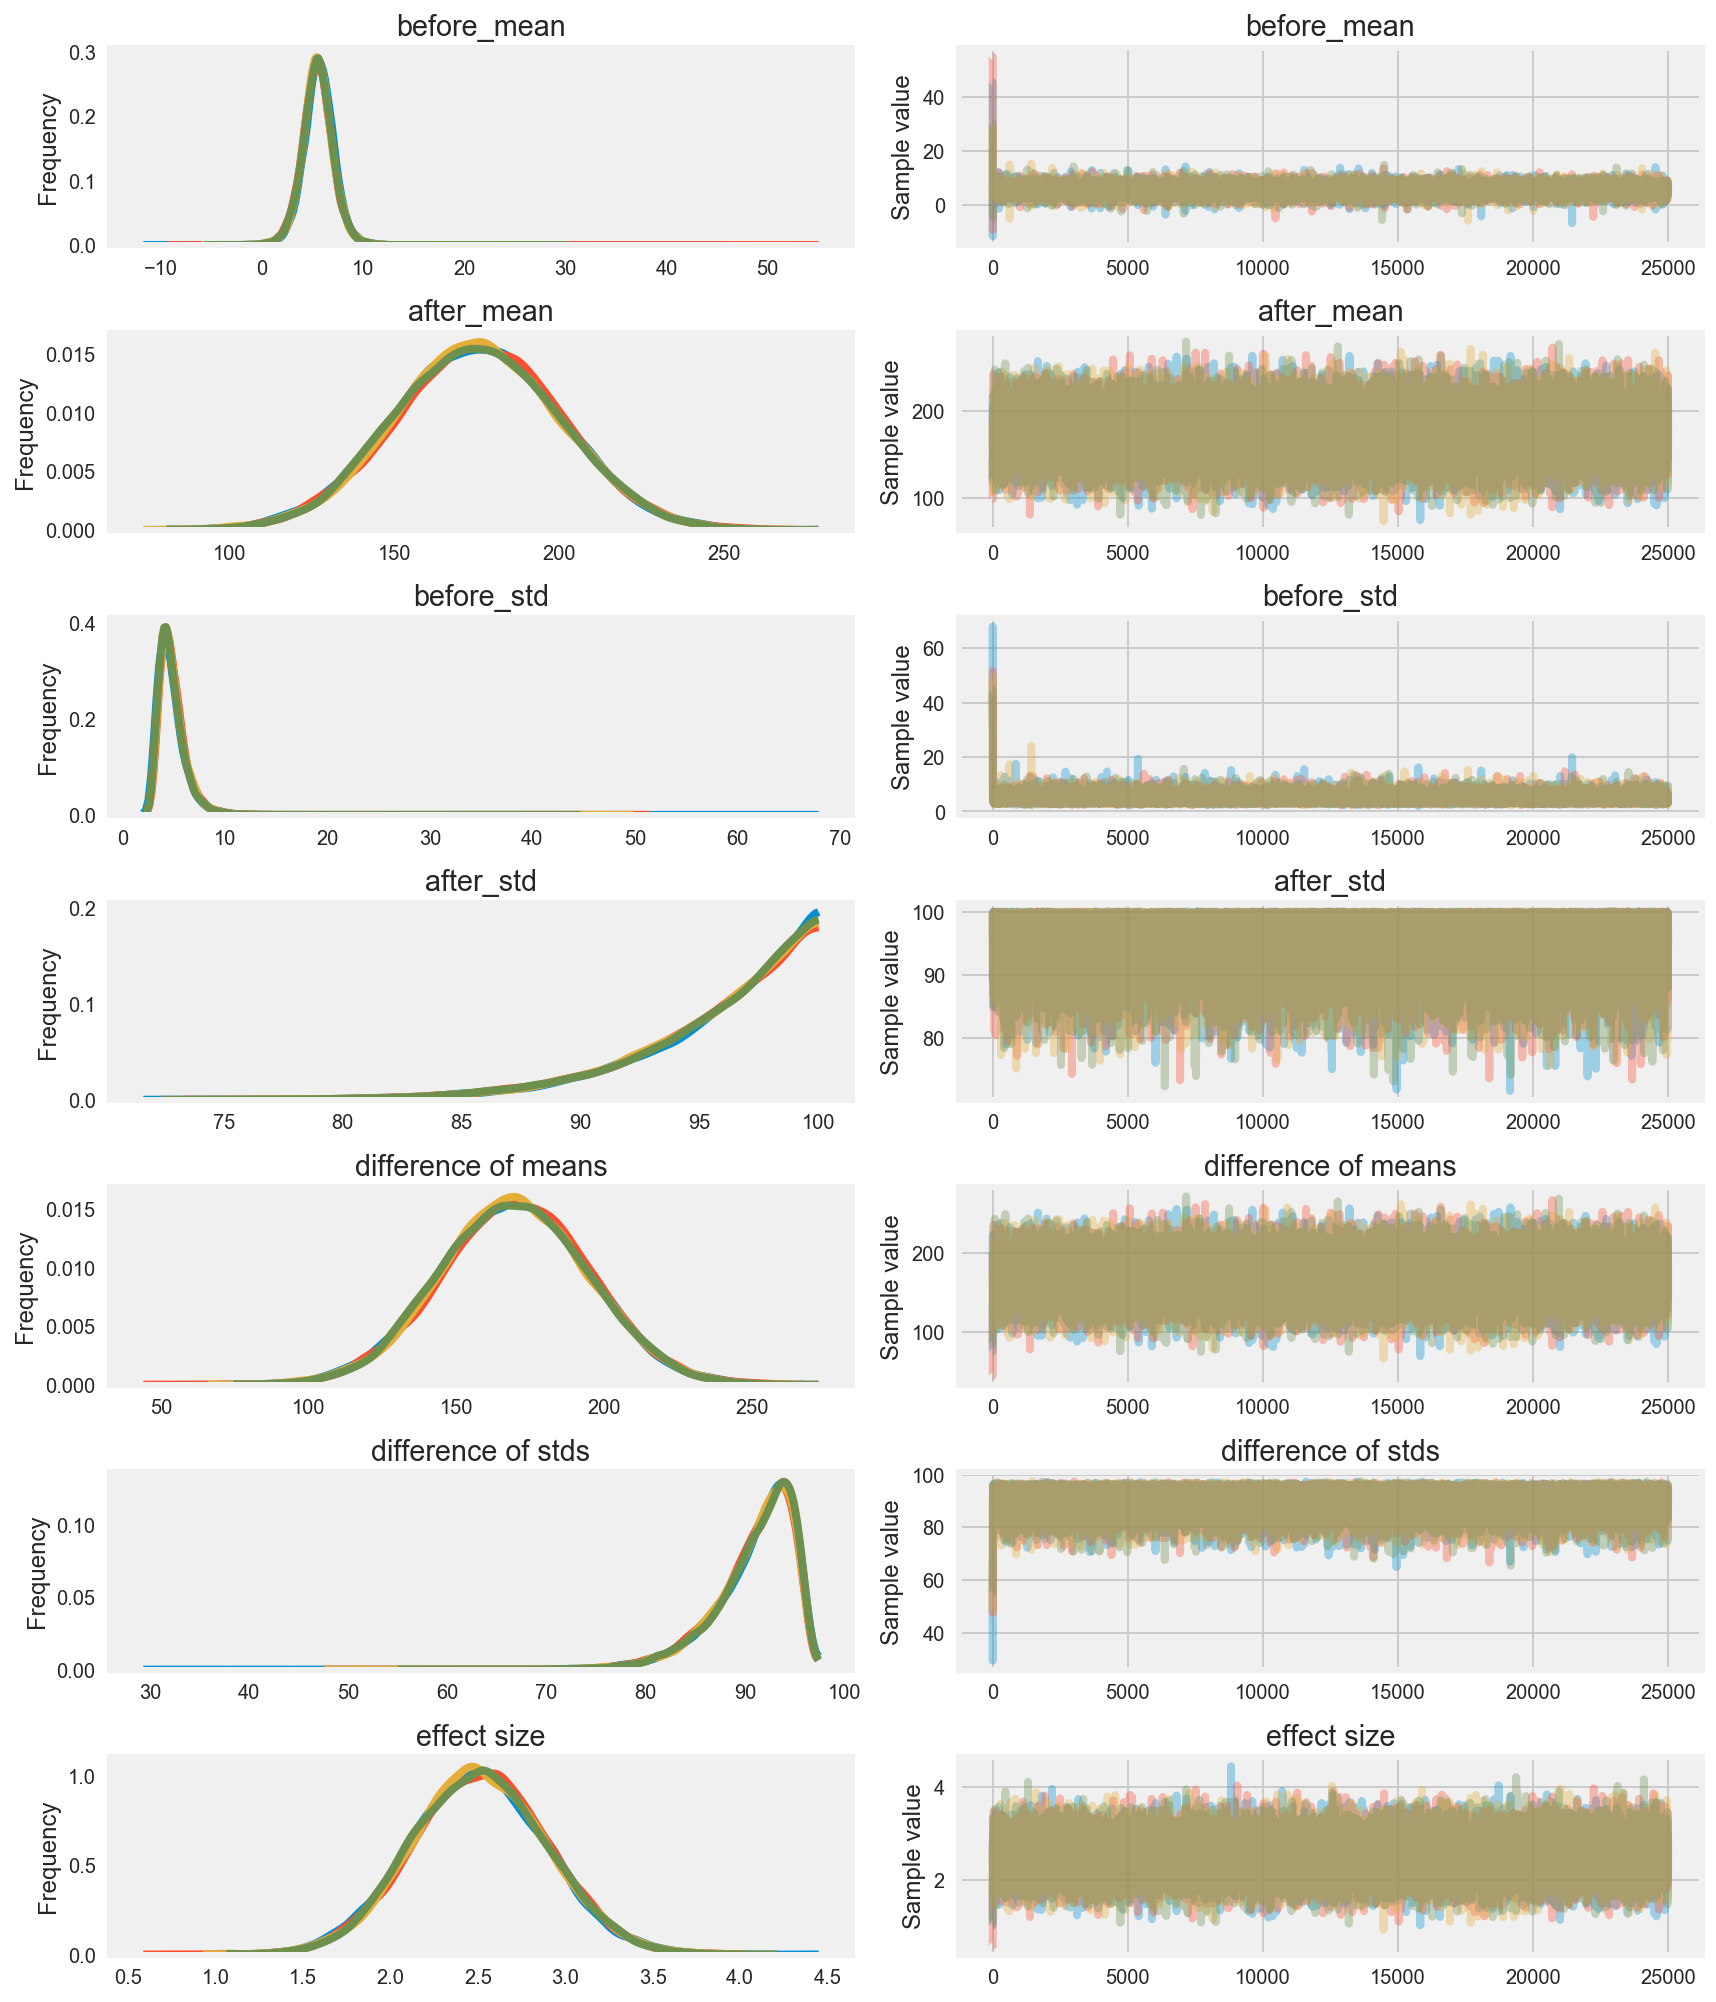

In [27]:
pm.traceplot(trace)

The HPD is the Highest Posterior Density interval. This gives us a bayesian "credible interval" which is the corollary to the frequentist confidence interval. The 95% HPD says that the 95% highest density points on the distribution fall within that range.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1296e3ed0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11847c8d0>], dtype=object)

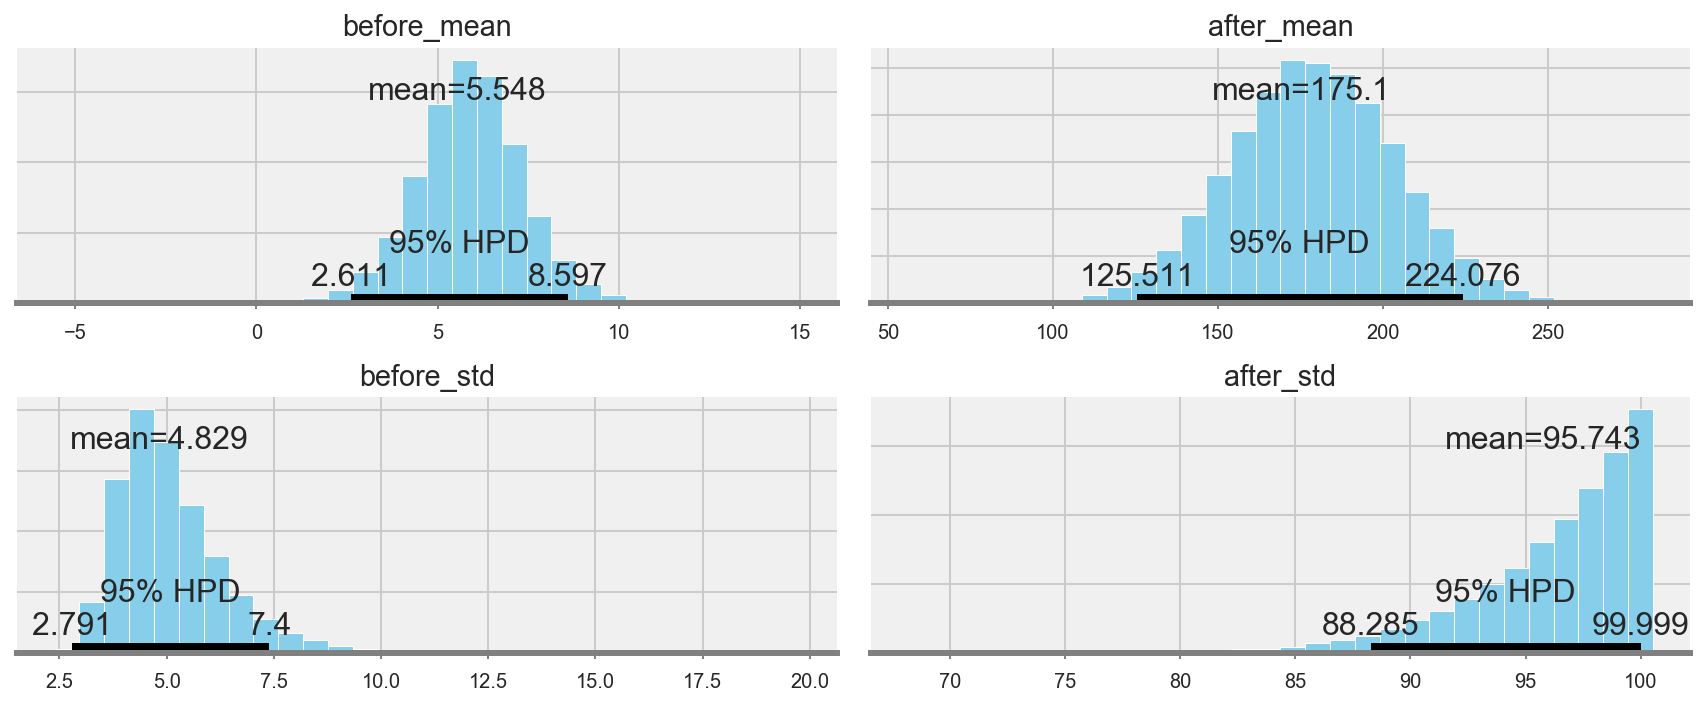

In [26]:
pm.plot_posterior(trace[3000:],
#                   varnames=['before_mean', 'after_mean', 'before_std', 'after_std'],
                  varnames=['after_mean', 'before_mean', 'before_std', 'after_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1294e5f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118571310>], dtype=object)

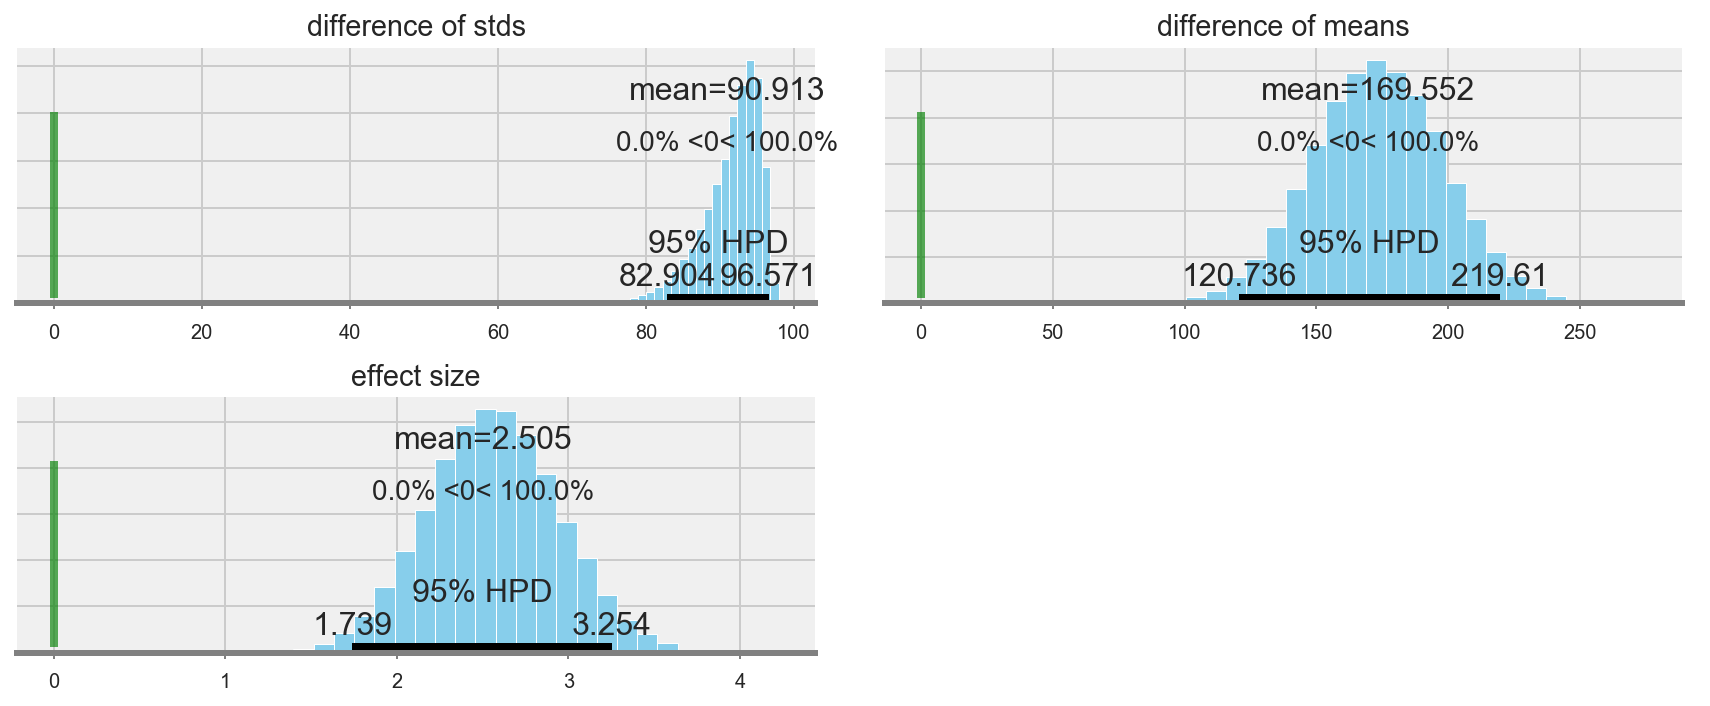

In [27]:

pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [24]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  169.423          25.302           0.137            [119.559, 218.966]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  119.559        152.391        169.429        186.455        218.966


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  90.879           3.950            0.022            [82.975, 96.690]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  80.962         88.831         91.774         93.824         95.945


effect size:

  Mean             SD               MC Error         95

In [66]:
df_before = df[(df.iyear<2001)&(df.iyear>=1991)]
df_after = df[(df.iyear>2001)&(df.iyear<=2005)]

In [67]:
# will be used to determine the prior
bayes_prior = df[['iyear',
                      'eventid']][df.suicide==1].groupby('iyear').eventid.count().reset_index()
bayes_prior.rename(columns={'eventid':'num_attacks'},inplace=True)


# set up bayesian model and priors on means
# this will be based on suicide attacks in the Middle East regardless of time period
mean_prior_mean = bayes_prior.num_attacks.mean()
mean_prior_std = bayes_prior.num_attacks.std()

std_prior_lower = 0.01
std_prior_upper = 100.0

# set the prior distribution to both time periods before and after 9/11 
# prior belief that the number of suicide attacks is the same
with pm.Model() as model:

    before_mean = pm.Normal('before_mean', mean_prior_mean, sd=mean_prior_std)
    after_mean = pm.Normal('after_mean', mean_prior_mean, sd=mean_prior_std)

    before_std = pm.Uniform('before_std', lower=std_prior_lower, upper=std_prior_upper)
    after_std = pm.Uniform('after_std', lower=std_prior_lower, upper=std_prior_upper)

In [68]:
# using the prior distribution, we will set up the posterior distribution
# so using before/after_means, stds, and then adding the observed suicide attacks 
# in both the time periods before and after 9/11

# create sub df containing the number of suicide attacks in the middle east & north africa
before = df_before[['iyear',
                      'eventid']][df_before.suicide==1].groupby('iyear').eventid.count().reset_index()
before.rename(columns={'eventid':'num_attacks'},inplace=True)


# create sub df containing the number of suicide attacks in the middle east & north africa
after = df_after[['iyear',
                      'eventid']][df_after.suicide==1].groupby('iyear').eventid.count().reset_index()
after.rename(columns={'eventid':'num_attacks'},inplace=True)


with model:
    posterior_before = pm.Normal('APM_19yo', mu=before_mean, sd=before_std, observed=before.num_attacks)
    posterior_after = pm.Normal('APM_26yo', mu=after_mean, sd=after_std, observed=after.num_attacks)

In [69]:
with model:

    diff_of_means = pm.Deterministic('difference of means', after_mean - before_mean)
    diff_of_stds = pm.Deterministic('difference of stds', after_std - before_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((after_std**2 + before_std**2) / 2))

In [70]:
with model:
    trace = pm.sample(25000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -81.673: 100%|██████████| 200000/200000 [00:33<00:00, 5895.04it/s]
Finished [100%]: Average ELBO = -81.351
100%|██████████| 25000/25000 [07:57<00:00, 52.31it/s] 


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12cec5a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x130f94890>]], dtype=object)

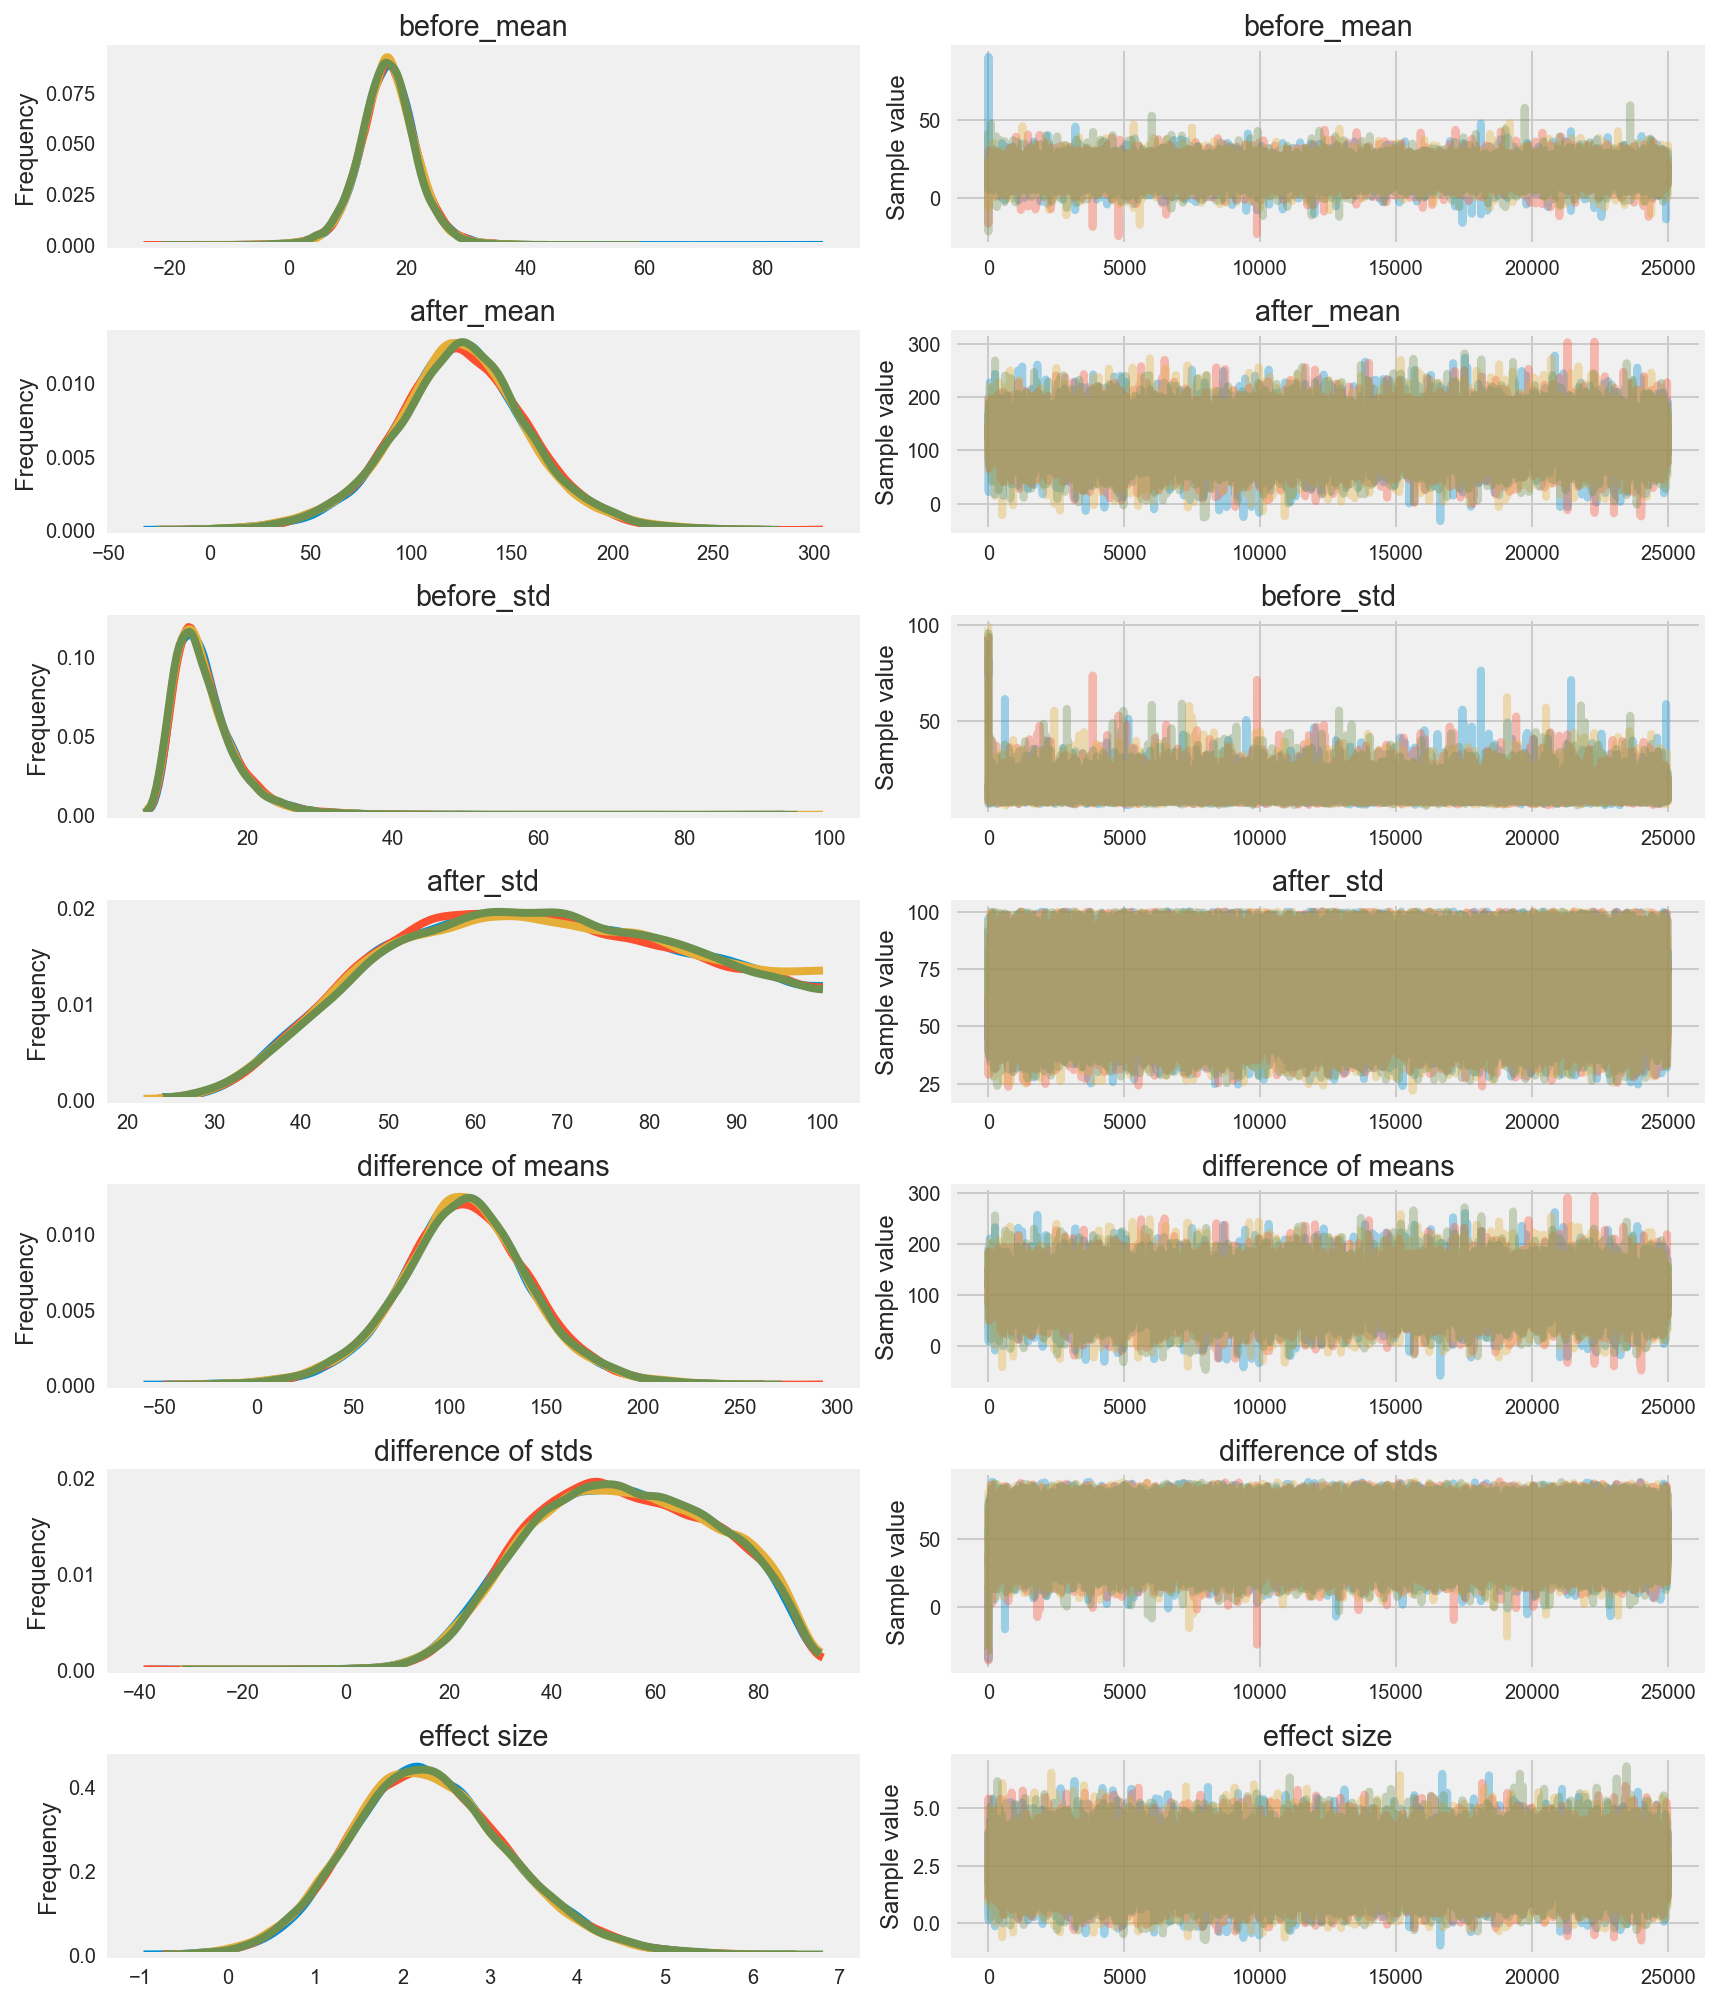

In [71]:
pm.traceplot(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x122dacc90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x135022310>], dtype=object)

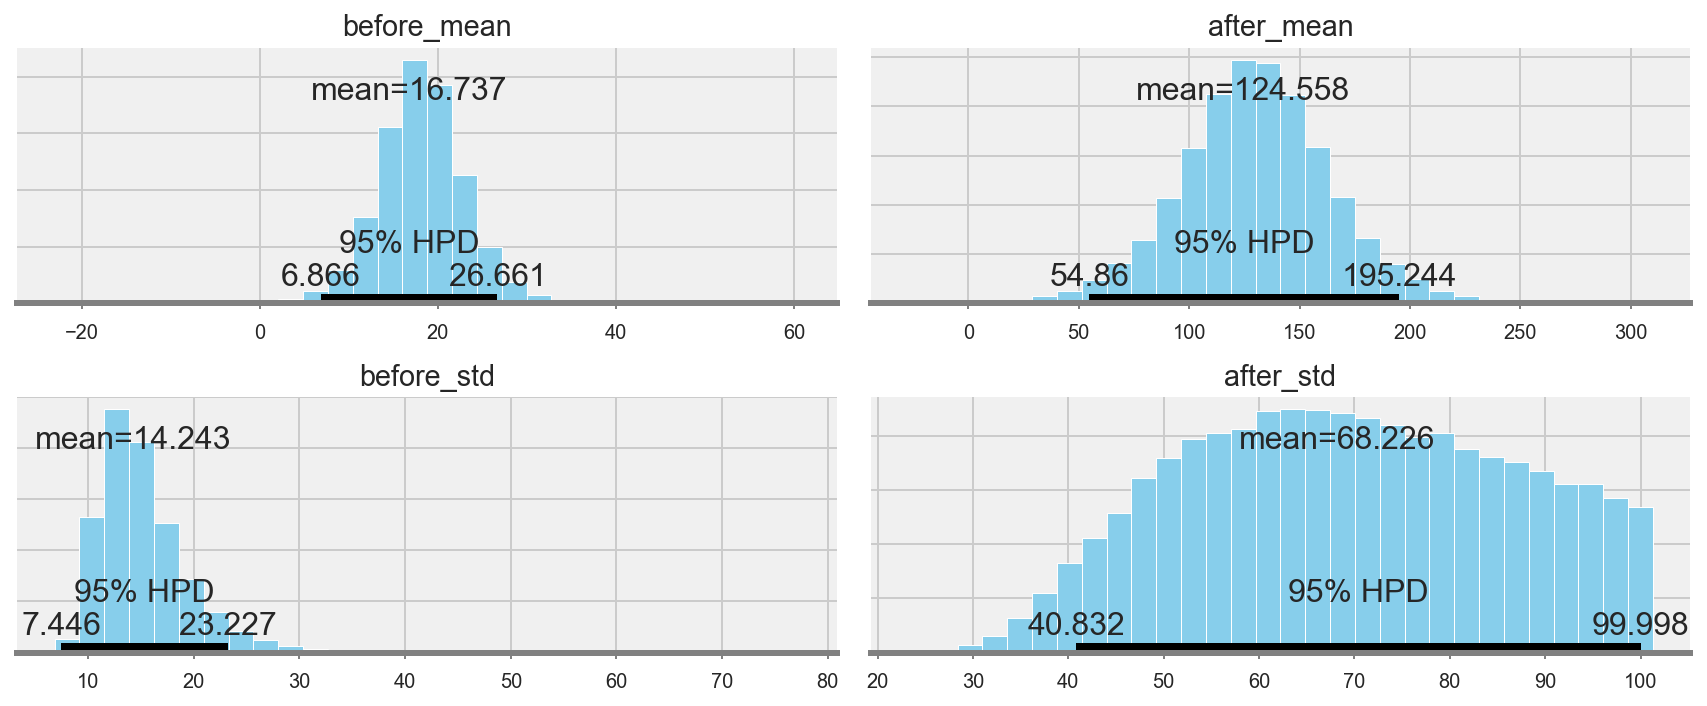

In [72]:
pm.plot_posterior(trace[3000:],
#                   varnames=['before_mean', 'after_mean', 'before_std', 'after_std'],
                  varnames=['after_mean', 'before_mean', 'before_std', 'after_std'],
                  color='#87ceeb')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13746f890>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x135191910>], dtype=object)

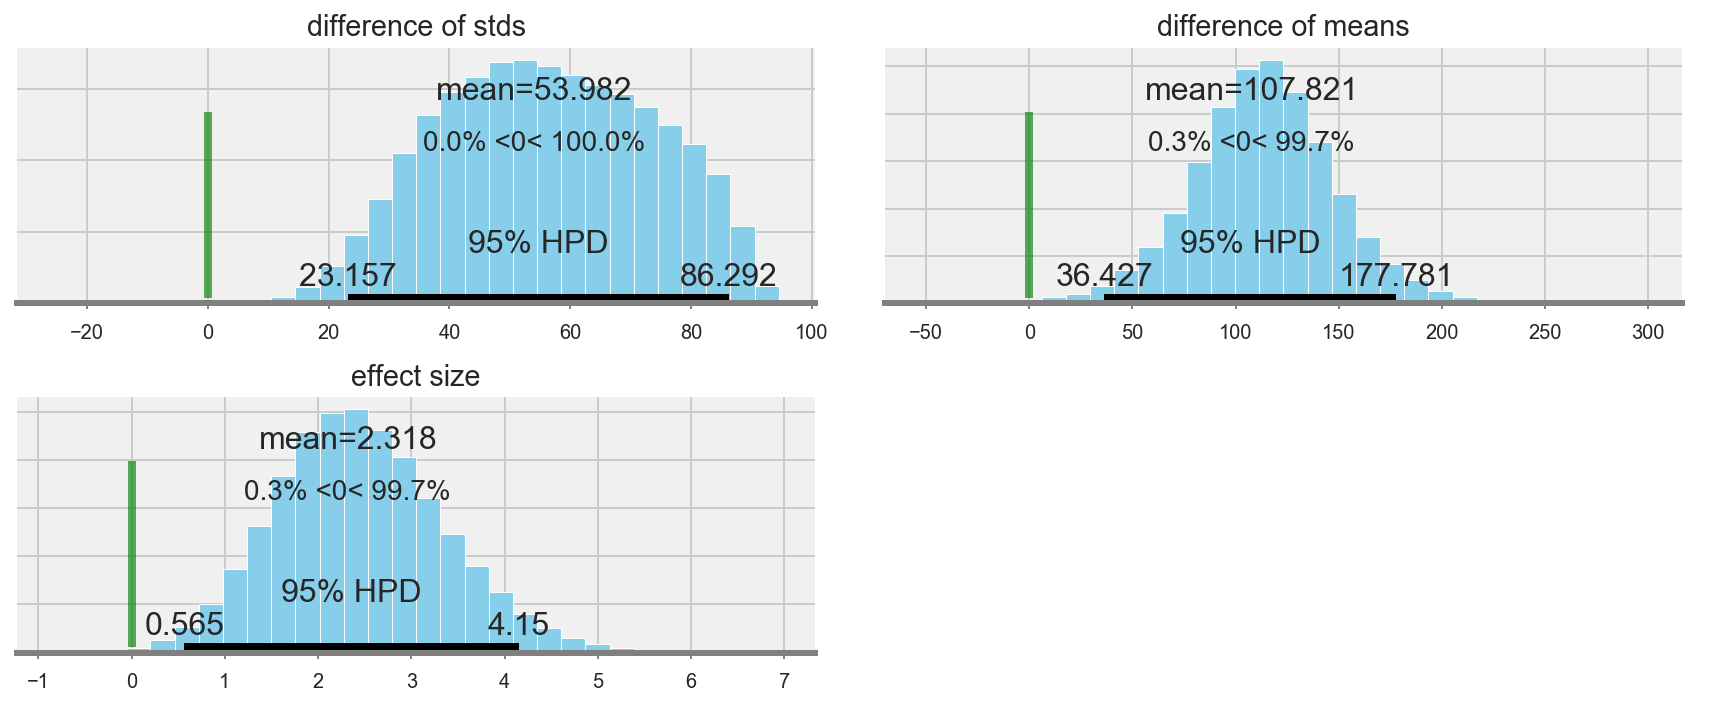

In [73]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [74]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])


difference of means:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  107.821          34.985           0.241            [36.427, 177.781]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  37.047         86.058         107.814        129.554        178.600


difference of stds:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  53.982           17.647           0.120            [23.157, 86.292]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  21.384         40.483         53.748         67.922         85.090


effect size:

  Mean             SD               MC Error         95%

# III. Impute 1993 Values

#### Set all dates to Jan 1st of respective year -- I found that this was the only way I could get the ARMA model to work

In [55]:
# Compile list of new dates
dates = []
for i in range(0,len(df)):
    dates.append(str(df.iyear.loc[i])+'-01-01')

# Add Date series to df
# df.drop('Date',axis=1,inplace=True)
df['Date'] = pd.Series(dates)
df.Date = pd.to_datetime(df.Date)

#### Create sub-df, grouping by year to get annual counts of terror attacks

In [77]:
impute = df[['Date','attacktype1','attacktype1_txt']][(df.attacktype1==3)&(df.iyear<=1992)].groupby(['Date','attacktype1']).attacktype1_txt.count().reset_index()
impute.rename(columns={'attacktype1_txt':'num_attacks'},inplace=True)
impute.drop(['attacktype1'],axis=1,inplace=True)

#converting 'date' column to a datetime type
impute['Date'] = pd.to_datetime(impute['Date'])
# resetting date back to the index
impute.set_index('Date',inplace = True)

#### Look at Autocorrelation and Partial Autocorrelation Plots to Determine p, q

In [79]:
len(impute)

23

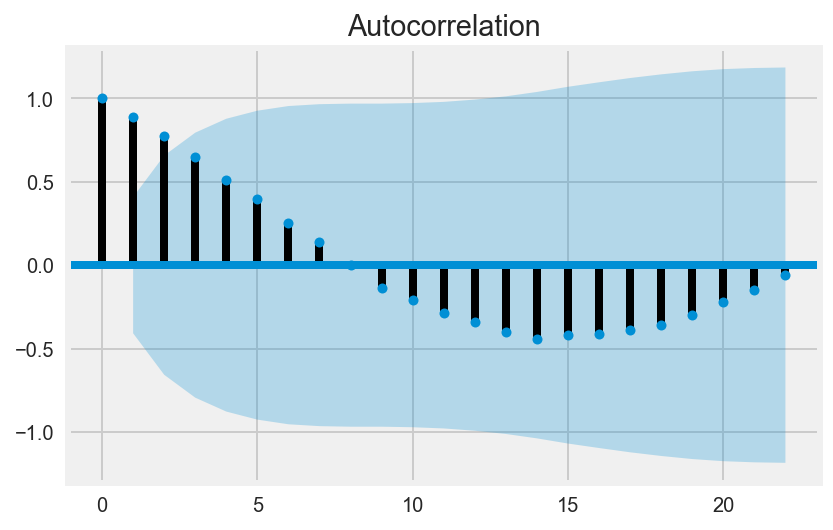

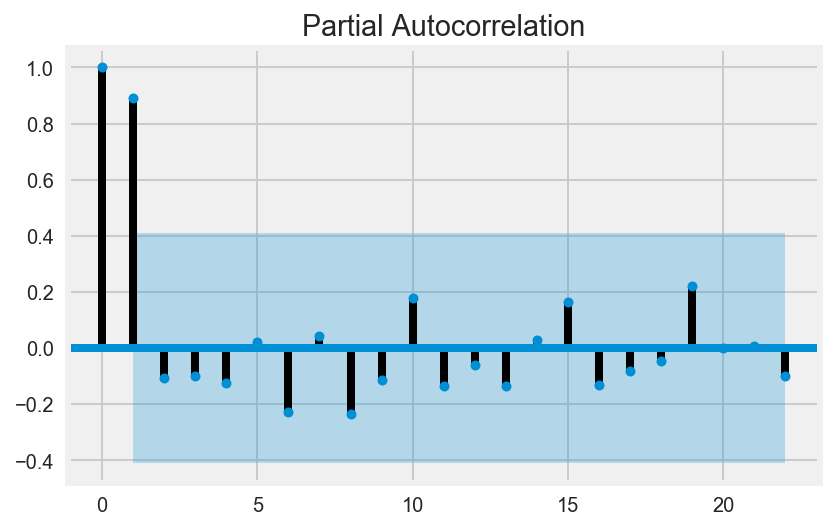

In [81]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Look Back 20 months to analyze Autocorr and Partial Autocorr
plot_acf(impute, lags = 22)
plt.show()

plot_pacf(impute, lags = 22)
plt.show()

My data is grouped by year, so I'm taking 1 unit to mean 1 year, especially since there are 23 years and the plots error out with 23 lags. Aside from 0 in the partial autocorrelation plot, the line from 1 has the highest partial autocorr, and is the only line outside of the 95% 

#### Create ARMA model, using p=1 to imply that the prior year has an impact on the current

                              ARMA Model Results                              
Dep. Variable:            num_attacks   No. Observations:                   23
Model:                     ARMA(1, 0)   Log Likelihood                -154.929
Method:                       css-mle   S.D. of innovations            193.289
Date:                Mon, 08 May 2017   AIC                            315.858
Time:                        23:09:40   BIC                            319.264
Sample:                    01-01-1970   HQIC                           316.715
                         - 01-01-1992                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              1036.9474    532.176      1.949      0.065      -6.099    2079.994
ar.L1.num_attacks     0.9552      0.048     19.963      0.000       0.861       1.049
                        

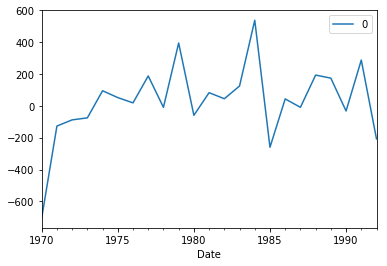

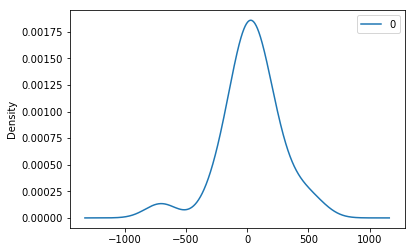

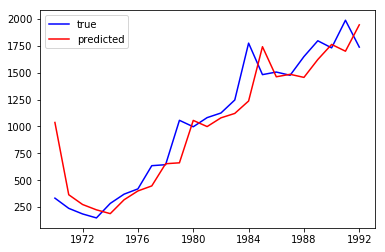

                0
count   23.000000
mean    29.227172
std    242.313101
min   -703.947413
25%    -67.130301
50%     43.957914
75%    149.720161
max    538.374743


In [246]:
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt

# fit model
impute.num_attacks = impute.num_attacks.astype(float)
model = ARMA(impute, order=(1,0))
model_fit = model.fit()
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
residuals.plot(kind='kde')
plt.show()
plt.plot(impute,color='blue',label='true')
plt.plot(model_fit.fittedvalues, color='red',label='predicted')
plt.legend()
plt.show()
print(residuals.describe())

#### Predict 1993 number of terror attacks

In [247]:
# get what you need for predicting one-step ahead
params = model_fit.params
residuals = model_fit.resid
p = model_fit.k_ar
q = model_fit.k_ma
k_exog = model_fit.k_exog
k_trend = model_fit.k_trend
steps = 1

_arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=impute, exog=None, start=len(impute))


array([ 1706.56203623])

Instead of making a pipeline, I'm going to make a function to predict the number of attacks for the other attack types.

In [58]:
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample
from statsmodels.tsa.arima_model import ARMA
from matplotlib import pyplot as plt

# not making a pipeline
def impute_attacks(attack_type,step=1):

    impute = df[['Date','attacktype1']][(df.attacktype1==attack_type)&(df.iyear<=1992)].groupby('Date').attacktype1.count().reset_index()
    impute.rename(columns={'attacktype1':'num_attacks'},inplace=True)
#     impute.drop(['attacktype1'],axis=1,inplace=True)
    #converting 'date' column to a datetime type
    impute['Date'] = pd.to_datetime(impute['Date'])
    # resetting date back to the index
    impute.set_index('Date',inplace = True)
    impute.num_attacks = impute.num_attacks.astype(float)
    model = ARMA(impute, order=(1,0))
    model_fit = model.fit()

    params = model_fit.params
    residuals = model_fit.resid
    p = model_fit.k_ar
    q = model_fit.k_ma
    k_exog = model_fit.k_exog
    k_trend = model_fit.k_trend
    steps = step
    
    attack_txt = df.attacktype1_txt[df.attacktype1==attack_type].unique()[0]
    return attack_txt, _arma_predict_out_of_sample(params, steps, residuals, p, q, k_trend, k_exog, endog=impute, exog=None, start=len(impute))[0]
    


In [63]:
# loop through each attack type and predict the number of attacks
predicted = []
for attack_type in (df.attacktype1.unique()):
    predicted.append(impute_attacks(attack_type))

# turn into dataframe and spit out total number of 1993 terror attacks
predicted = pd.DataFrame(predicted,columns=['Attack Type','1993 Predicted Number of Attacks'])
print 'Total # of Terror Attacks in 1993: ',predicted.sum()[1]; predicted

Total # of Terror Attacks in 1993:  4886.29955501


,Attack Type,1993 Predicted Number of Attacks
0,Assassination,1067.178226
1,Hostage Taking (Kidnapping),133.048854
2,Bombing/Explosion,1706.562036
3,Facility/Infrastructure Attack,452.215209
4,Armed Assault,1301.687231
5,Hijacking,17.084018
6,Unknown,143.243192
7,Unarmed Assault,43.069856
8,Hostage Taking (Barricade Incident),22.210933


In [20]:
bombings = df[['iyear','country_txt','latitude','longitude','attacktype1_txt']][df.attacktype1_txt=='Bombing/Explosion']
bombings = bombings.groupby(['iyear','country_txt','latitude','longitude']).attacktype1_txt.count().reset_index()

In [ ]:
bombings = bombings.merge(world[['name','geometry','iso_a3','pop_est']],how='left', left_on='country_txt', right_on='name').drop('name',axis=1)

In [ ]:
bombings.dropna(inplace=True)
type(bombings)

In [ ]:
import os
import pandas as pd
import numpy as np
from random import randint, uniform
from datetime import datetime
from urllib import urlretrieve
from zipfile import ZipFile
import pysal

# geo stuff
import geopandas as gpd
from shapely.geometry import Point
# from ipyleaflet import (Map,
#     Marker,
#     TileLayer, ImageOverlay,
#     Polyline, Polygon, Rectangle, Circle, CircleMarker,
#     GeoJSON,
#     DrawControl
# )

# plotting stuff
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = (20.0, 20.0)

# widget stuff
from ipywidgets import interact, HTML, FloatSlider
from IPython.display import clear_output, display

# progress stuff
from tqdm import tqdm_notebook, tqdm_pandas

# turn warnings off
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pysal
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
terror = pd.read_csv('/Users/jennydoyle/Desktop/dsi/04-project-assets/globalterrorismdb_0616dist.csv')


fix_names = {'Dem. Rep. Korea':'South Korea',
'Korea':'North Korea',
'Czech Rep.':'Czech Republic',
'Bosnia and Herz.':'Bosnia-Herzegovina',
'Bosnia and Herzegovina':'Bosnia-Herzegovina',
'Central African Rep.': 'Central African Republic',
 'Dem. Rep. Congo':  'Congo',
'Lao PDR':'Laos',
'Slovakia':'Slovak Republic'}

world.name.replace(fix_names, inplace=True)

fix_countries = {'Democratic Republic of the Congo':'Congo',
"People's Republic of the Congo"  :'Congo',
'Republic of the Congo':'Congo',
'Dominica':'Dominican Rep.',
'Dominican Republic':'Dominican Rep.',
'Czechoslovakia': 'Czech Republic',
'East Germany (GDR)':'Germany',
'East Timor':'Timor-Leste', 
'Equatorial Guinea':'Eq. Guinea',                
'Falkland Islands':'Falkland Is.',
'Hong Kong':'China',
'North Yemen':'Yemen',
'Serbia-Montenegro':'Serbia',
'Solomon Islands':'Solomon Is.',
'South Sudan':'Sudan',
'South Vietnam':'Vietnam',
'South Yemen':'Yemen',
'Soviet Union':'Russia',
'West Germany (FRG)':'Germany',                 
'Western Sahara':'W. Sahara'}

terror.country_txt.replace(fix_countries, inplace=True)


terror_grouped = terror.groupby('country_txt').count().reset_index()
terror_grouped = terror_grouped[['country_txt','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')

q10 = pysal.Quantiles(world_terror.Num_Tattacks,k=10)
f, ax = plt.subplots(1, figsize=(20,10))
world_terror.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
ax.set_axis_off()
plt.show()

# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html

In [ ]:
def make_plot(year=1970):

    # filter dataframe
    temp = world_terror[world_terror['iyear']==year]
    
    q10 = pysal.Quantiles(temp.Num_Tattacks,k=10)
    f, ax = plt.subplots(1, figsize=(20,10))
    temp.assign(cl=q10.yb).plot(column='Num_Tattacks', categorical=True, cmap='OrRd', linewidth=0.1, ax=ax, k=10, scheme='QUANTILES')
    ax.set_axis_off()
    plt.show()

In [ ]:
terror_grouped = terror[terror.attacktype1_txt=='Bombing/Explosion'].groupby(['country_txt','iyear']).count().reset_index()
terror_grouped = terror_grouped[['country_txt','iyear','eventid']]
terror_grouped.rename(columns={'eventid':'Num_Tattacks'},inplace=True)

world_terror = world.merge(terror_grouped, left_on='name', right_on='country_txt')



# http://darribas.org/gds_scipy16/ipynb_md/02_geovisualization.html





# create widget
interact(make_plot, year=(1970, 2015, 1))


